## importing torch

In [1]:
import torch
torch.__version__

'1.12.0'

In [2]:
 torch.cuda.is_available()

False

## example

In [3]:
dd=[[1,2,3],[4,5,6],[7,8,9]]
t=torch.tensor(dd)
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [4]:
t.shape

torch.Size([3, 3])

In [5]:
t=t.reshape(1,9)

In [6]:
len(t.shape)

2

In [7]:
dd[1]

[4, 5, 6]

In [8]:
t=torch.Tensor()
print(t.dtype)
print(t.device)
print(t.layout)

torch.float32
cpu
torch.strided


In [9]:
device=torch.device('cuda:0')
device

device(type='cuda', index=0)

## constructor & factory function

In [10]:
import numpy as np
data=np.array([1,2,3])
o1 = torch.Tensor(data)
o2 = torch.tensor(data)
o3 = torch.as_tensor(data)
o4 = torch.from_numpy(data)
print(o1,o2,o3,o4)

tensor([1., 2., 3.]) tensor([1, 2, 3], dtype=torch.int32) tensor([1, 2, 3], dtype=torch.int32) tensor([1, 2, 3], dtype=torch.int32)


## reshapping

In [11]:
t=torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)
# number of elements
print(torch.tensor(t.shape).prod())
print(torch.numel(t))

tensor(12)
12


In [12]:
t=t.reshape(1,-1)
print(t)
print(t.shape)
t=t.squeeze()
print(t)
print(t.shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


## flatten

In [13]:
def flatten(t):
    t=t.reshape(1,-1)
    t=t.squeeze()
    return t

In [14]:
f=torch.tensor([[1,1,1],[2,3,4],[7,8,5]])
t=f.reshape(1,-1)
t1=t.squeeze()
t2=t1.unsqueeze(dim=0)
print(f)
print(t)
print(t1)
print(t2)
print(t.shape)
print(t1.shape)
print(t2.shape)
f=flatten(f)
print(f)
print(f.shape)

tensor([[1, 1, 1],
        [2, 3, 4],
        [7, 8, 5]])
tensor([[1, 1, 1, 2, 3, 4, 7, 8, 5]])
tensor([1, 1, 1, 2, 3, 4, 7, 8, 5])
tensor([[1, 1, 1, 2, 3, 4, 7, 8, 5]])
torch.Size([1, 9])
torch.Size([9])
torch.Size([1, 9])
tensor([1, 1, 1, 2, 3, 4, 7, 8, 5])
torch.Size([9])


## cancatenate

In [15]:
t1=torch.tensor([[1,2,3],[5,6,7]])
t2=torch.tensor([[1,6,2],[6,6,9]])
t3=torch.cat((t1,t1), dim=0) # row wise
t4=torch.cat((t1,t1), dim=1) # column wise
print(t3)
print(t3.shape)
print(t4)
print(t4.shape)

tensor([[1, 2, 3],
        [5, 6, 7],
        [1, 2, 3],
        [5, 6, 7]])
torch.Size([4, 3])
tensor([[1, 2, 3, 1, 2, 3],
        [5, 6, 7, 5, 6, 7]])
torch.Size([2, 6])


## combining gray scale images

In [16]:
#three images

t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,5,3]
])

t=torch.stack((t1,t2,t3))
print(t.shape)
# 3----batch size,1--------channal, 

t=t.reshape(3,1,4,4)
print(t.shape)
print(t)

torch.Size([3, 4, 4])
torch.Size([3, 1, 4, 4])
tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 5, 3]]]])


In [17]:
print(t[0])

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])


In [18]:
print(t[1])

tensor([[[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]]])


In [19]:
print(t.shape)

torch.Size([3, 1, 4, 4])


In [20]:
print(t[0][0][0][0])

tensor(1)


In [21]:
# acces 5
print(t[2][0][3][2])

tensor(5)


In [22]:
t=t.reshape(1,-1).squeeze()
t

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3])

In [23]:
t=t.reshape(t.shape[0],(torch.numel(t)//t.shape[0])).squeeze()
t.shape

torch.Size([48])

In [24]:
t.flatten(start_dim=1).shape

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

## Element-Wise Tensor Operations For Deep Learning

In [ ]:
import torch
t1=torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32)
t2=torch.tensor([[1,2,3],[4,7,6]] ,dtype=torch.float32)
t=t1+t2
print(t)

In [ ]:
t=t1-t2
print(t)
t=t1*t2
print(t)
t=t1/t2
print(t)

### broadcasting

In [ ]:
t=t1-2
print(t)
t=t1*2
print(t)
t=t1/2
print(t)
print(t1.add(2))
print(t1.sub(2))
print(t1.mul(2))
print(t1.div(2))

In [ ]:
import numpy as np
t3=torch.tensor(np.broadcast_to(2, t1.shape),dtype=torch.float32)
print(t3)

In [ ]:
t=t1+t3
print(t)

In [ ]:
t1 = torch.tensor([
    [1,1],
    [1,1]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)
t5=torch.tensor(np.broadcast_to(t2, t1.shape),dtype=torch.float32)
print(t5)

### comparison

In [ ]:
print(t1>t2)
print(t1.eq(0))
print(t1<t2)
print(t1.ge(1))


In [ ]:
t.abs() 

In [ ]:
t.sqrt()

## Tensor Reduction Ops For Deep Learning

In [ ]:
import torch
t=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float32)
print(t.sum())
print(t.sum().numel()<t.numel())
t.prod()
t.std()

In [ ]:
t.sum(dim=0)

In [ ]:
t.sum(dim=1)

In [ ]:
print(t[0])
print(t[1])

In [ ]:
t[0].sum()

In [ ]:
t.max()
print(t.max())
print(t.argmax())

In [ ]:
t.argmax(dim=0)

In [ ]:
t.max(dim=0)

In [ ]:
print(t.mean())
t.mean().item()

In [ ]:
print(t.mean(dim=0).tolist())
t.mean(dim=0).numpy()


## data loading


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

train_set=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

In [ ]:

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [ ]:
train_loader=torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)


## data visulaizing

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


train_set=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

loader=torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)


In [ ]:
sample=next(iter(train_set))
print(type(sample))
print(sample)


In [ ]:
import matplotlib.pyplot as plt
image,label=sample
plt.imshow(image.squeeze(),cmap='gray')
plt.xlabel(label)


In [ ]:
# disply a batch
laoder= torch.utils.data.DataLoader(train_set, batch_size=20)

In [ ]:
batch=next(iter(laoder))

In [ ]:
print(len(batch))

In [ ]:
import numpy as np
images,labels=batch
images[0].shape 
grid=torchvision.utils.make_grid(images, nrow=5)
plt.imshow(np.transpose(grid, (1,2,0)))
plt.xlabel(labels)

In [ ]:
class Network(nn.Module): # line 1
    def __init__(self):
        super(Network,self).__init__() # line 3   
        # The super() builtin returns a proxy object (temporary object of the superclass) that allows us to access methods of the base class.
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = self.layer(t)
        return t

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.Con1=nn.Conv2d(in_channels= 1    ,out_channels=6, kernel_size=5)
        self.Con2=nn.Conv2d(in_channels= 6    ,out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        return t

## PyTorch CNN Layer Parameters

In [ ]:
network=Network()
print(network)

In [ ]:
network.Con1
network.Con1.weight

In [ ]:
for param in network.parameters():
    print(param.shape)

## PyTorch Callable Neural Networks - Deep Learning In Python

In [ ]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

weight_matrix.matmul(in_features)

In [ ]:
t=torch.tensor([1,2,3,4],dtype=torch.float32)
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

weight_matrix.matmul(t)


In [ ]:
fc=nn.Linear(in_features=4 , out_features=3)

In [ ]:
fc(in_features)
fc.weight

In [ ]:
fc.weight = nn.Parameter(weight_matrix)  

In [ ]:
fc.weight

In [ ]:
fc(in_features)

In [ ]:
class Network1(nn.Module):
    def __init__(self):
        super(Network1,self).__init__()
        self.Con1=nn.Conv2d(in_channels= 1    ,out_channels=6, kernel_size=5)
        self.Con2=nn.Conv2d(in_channels= 6    ,out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        # 1 layer
        t=t
        # 2layer
        t=self.Con1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2, stride=2)
        #3 layer
        t=self.Con2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2, stride=2)
        #4layer
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        #5 layer
        t=self.fc2(t)
        t=F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        return t
    
  

In [ ]:
sample=next(iter(train_set))
image,label=sample
image.shape 
image.unsqueeze(0).shape


g=image.unsqueeze(0)
g.shape
network=Network1()
pred = network(g) 
print(pred)

In [ ]:
pred.argmax(dim=1)

## for batch

In [ ]:
laoder= torch.utils.data.DataLoader(train_set, batch_size=20)
batch=next(iter(laoder))
images,labels=batch
images.shape 



network=Network1()
pred = network(images) 
pred.shape

In [ ]:
pred.argmax(dim=1)

In [ ]:
labels

In [ ]:
pred.argmax(dim=1).eq(labels)

## back propagation

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

train_set=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

laoder= torch.utils.data.DataLoader(train_set, batch_size=20)
batch=next(iter(laoder))
images,labels=batch

        

In [10]:
class Network2(nn.Module):
    def __init__(self):
        super(Network2,self).__init__()
        self.con1= nn.Conv2d(in_channels=1   ,out_channels=6, kernel_size=5)
        self.con2= nn.Conv2d(in_channels=6,   out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60,  out_features=10)
        
    
    
    def forward(self,t):
        # 1 layer
        t=t
        # 2layer
        t=self.con1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2, stride=2)
        #3 layer
        t=self.con2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2, stride=2)
        #4layer
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        #5 layer
        t=self.fc2(t)
        t=F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        return t
        

In [29]:
torch.set_grad_enabled(True)

laoder= torch.utils.data.DataLoader(train_set, batch_size=100)
batch=next(iter(laoder))
images,labels=batch

network=Network2()
preds = network(images) 

loss = F.cross_entropy(preds, labels)
loss.item
loss.backward()
network.con1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [30]:
loss.item()

2.2984299659729004

In [31]:

optimizer = optim.Adam(network.parameters(), lr=0.01)
optimizer.step() # Updating the weights
preds = network(images)


loss = F.cross_entropy(preds, labels)
loss.item()

2.2562143802642822

## complete code for all batches

In [32]:
torch.set_grad_enabled(True)
network=Network2()
optimizer = optim.Adam(network.parameters(), lr=0.01)
train_loader = torch.utils.data.DataLoader(
    train_set
    ,batch_size=100
    ,shuffle=True
)

for ep in range(3):
    total_loss=0
   
    for batch in train_loader:
        images,labels=batch
        preds=network(images) 
        loss = F.cross_entropy(preds, labels) #calculte loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("epoch", ep, "loss:", total_loss)
       

epoch 0 loss: 353.0764392763376
epoch 1 loss: 235.32924690842628
epoch 2 loss: 213.9722430408001


## confusion matrix

In [34]:
print(len(train_set))
print(len(train_set.targets))



60000
60000


In [41]:
def get_all_preds(model,loader,):
    all_pred=torch.tensor([])
    for batch in laoder:
        images,labels=batch
        preds=network(images)
        all_pred=torch.cat((all_pred,preds),dim=0)
    return all_pred
        

In [42]:

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

In [43]:
train_preds.shape

torch.Size([60000, 10])

In [45]:
stacked=torch.stack((train_set.targets,train_preds.argmax(dim=1)),dim=1)


In [46]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [54]:
cmt= torch.zeros((10,10), dtype=torch.float32)
cmt

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
for p in stacked:
    j,k=p.tolist()
    cmt[j,k]=cmt[j,k]+1

In [56]:
cmt

tensor([[5.3260e+03, 5.0000e+00, 8.1000e+01, 2.0900e+02, 1.6000e+01, 4.0000e+00,
         2.7400e+02, 2.0000e+00, 8.2000e+01, 1.0000e+00],
        [1.0000e+01, 5.8050e+03, 1.0000e+00, 1.4100e+02, 1.3000e+01, 1.0000e+00,
         1.2000e+01, 0.0000e+00, 1.7000e+01, 0.0000e+00],
        [9.6000e+01, 0.0000e+00, 4.6890e+03, 9.7000e+01, 7.6200e+02, 1.0000e+00,
         2.8700e+02, 0.0000e+00, 6.8000e+01, 0.0000e+00],
        [1.5300e+02, 2.4000e+01, 1.5000e+01, 5.5640e+03, 1.3700e+02, 1.0000e+00,
         9.5000e+01, 0.0000e+00, 1.1000e+01, 0.0000e+00],
        [1.1000e+01, 5.0000e+00, 3.8700e+02, 3.2200e+02, 4.9590e+03, 1.0000e+00,
         2.8300e+02, 1.0000e+00, 3.1000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 5.7860e+03,
         0.0000e+00, 1.5000e+02, 6.0000e+00, 5.7000e+01],
        [1.2520e+03, 9.0000e+00, 5.6600e+02, 1.8300e+02, 6.3400e+02, 1.0000e+00,
         3.1820e+03, 0.0000e+00, 1.7300e+02, 0.0000e+00],
        [0.0000e+00, 0.0000

In [58]:
pip install resource

  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3325 sha256=f8c9fd4385ad09cc0d1cb6bdb69f0197b9c3745af9b5cc8cd2998ad9f88240eb
  Stored in directory: c:\users\pssrl\appdata\local\pip\cache\wheels\2e\bd\ab\c1026535edf314ce2b0d7ba3b2dd0ca67bfb5bae2cb301510f
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4769 sha256=9a6394731d6a4d113f8c6d49eb9bfd26ed764dd0059cd0b06406bac9137c4299
  Stored in directory: c:\users\pssrl\appdata\local\pip\cache\wheels\bb\e7\72\08831f4f1927bfcb155f0a971e253bfe677172cebea1332b51
Successfully built JsonForm JsonSir
Note: you may need to restart the kernel to use updated packages.


In [60]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from resources.plotcm import plot_confusion_matrix


ModuleNotFoundError: No module named 'resources'

In [61]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
tensor([[5.3260e+03, 5.0000e+00, 8.1000e+01, 2.0900e+02, 1.6000e+01, 4.0000e+00,
         2.7400e+02, 2.0000e+00, 8.2000e+01, 1.0000e+00],
        [1.0000e+01, 5.8050e+03, 1.0000e+00, 1.4100e+02, 1.3000e+01, 1.0000e+00,
         1.2000e+01, 0.0000e+00, 1.7000e+01, 0.0000e+00],
        [9.6000e+01, 0.0000e+00, 4.6890e+03, 9.7000e+01, 7.6200e+02, 1.0000e+00,
         2.8700e+02, 0.0000e+00, 6.8000e+01, 0.0000e+00],
        [1.5300e+02, 2.4000e+01, 1.5000e+01, 5.5640e+03, 1.3700e+02, 1.0000e+00,
         9.5000e+01, 0.0000e+00, 1.1000e+01, 0.0000e+00],
        [1.1000e+01, 5.0000e+00, 3.8700e+02, 3.2200e+02, 4.9590e+03, 1.0000e+00,
         2.8300e+02, 1.0000e+00, 3.1000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 5.7860e+03,
         0.0000e+00, 1.5000e+02, 6.0000e+00, 5.7000e+01],
        [1.2520e+03, 9.0000e+00, 5.6600e+02, 1.8300e+02, 6.3400e+02, 1.0000e+00,
         3.1820e+03, 0.0000e+00, 1.7300e+02, 

ValueError: Unknown format code 'd' for object of type 'float'

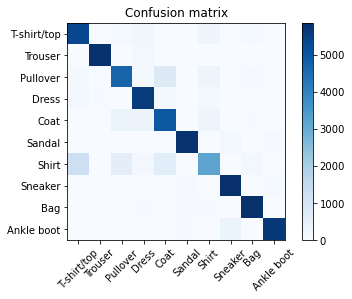

In [63]:
plot_confusion_matrix(cmt, train_set.classes)

## TensorBoard: TensorFlow's Visualization Toolkit
TensorBoard provides the visualization and tooling needed for machine learning experimentation:

Tracking and visualizing metrics such as loss and accuracy
Visualizing the model graph (ops and layers)
Viewing histograms of weights, biases, or other tensors as they change over time
Projecting embeddings to a lower dimensional space
Displaying images, text, and audio data
Profiling TensorFlow programs
And much more

In [3]:
import torch
print(torch.__version__)

1.12.0


In [4]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [5]:

from torch.utils.tensorboard import SummaryWriter

In [6]:
tb=SummaryWriter

In [18]:
network=Network2()
train_loader = torch.utils.data.DataLoader(
    train_set
    ,batch_size=100
    ,shuffle=True
)
images, labels=next(iter(train_loader))

grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()



In [21]:
network = Network2()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)

for epoch in range(5):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images,labels= batch
        preds=network(images)
        loss=F.cross_entropy(preds,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_correct += preds.argmax(dim=1).eq(labels).sum().item()
    

    tb.add_scalar('Loss', total_loss, epoch)
    tb.add_scalar('Number Correct', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    tb.add_histogram('conv1.bias', network.con1.bias, epoch)
    tb.add_histogram('conv1.weight', network.con1.weight, epoch)
    tb.add_histogram( 'conv1.weight.grad',network.con1.weight.grad,epoch)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

tb.close()


epoch 0 total_correct: 47366 loss: 334.6899947375059
epoch 1 total_correct: 51679 loss: 226.06625418365002
epoch 2 total_correct: 52230 loss: 208.71307377517223
epoch 3 total_correct: 52533 loss: 200.02272686362267
epoch 4 total_correct: 52685 loss: 196.75627595186234


## Experimenting With Hyperparameter Values

In [28]:
batch_size_list = [100, 1000, 10000]
lr_list = [.01, .001, .0001, .00001]
for batch_size in batch_size_list:
    for lr in lr_list:
        network = Network2()

        train_loader = torch.utils.data.DataLoader(
            train_set, batch_size=batch_size
        )
        optimizer = optim.Adam(
            network.parameters(), lr=lr
        )

        images, labels = next(iter(train_loader))
        grid = torchvision.utils.make_grid(images)

        comment=f' batch_size={batch_size} lr={lr}'
        tb = SummaryWriter(comment=comment)
        tb.add_image('images', grid)
        tb.add_graph(network, images)

        for epoch in range(5):
            total_loss = 0
            total_correct = 0
            for batch in train_loader:
                images, labels = batch # Get Batch
                preds = network(images) # Pass Batch
                loss = F.cross_entropy(preds, labels) # Calculate Loss
                optimizer.zero_grad() # Zero Gradients
                loss.backward() # Calculate Gradients
                optimizer.step() # Update Weights

                total_loss += loss.item() * batch_size
                total_correct += preds.argmax(dim=1).eq(labels).sum().item()

            tb.add_scalar(
                'Loss', total_loss, epoch
            )
            tb.add_scalar(
                'Number Correct', total_correct, epoch
            )
            tb.add_scalar(
                'Accuracy', total_correct / len(train_set), epoch
            )

            for name, param in network.named_parameters():
                tb.add_histogram(name, param, epoch)
                tb.add_histogram(f'{name}.grad', param.grad, epoch)

            print(
                "epoch", epoch
                ,"total_correct:", total_correct
                ,"loss:", total_loss
            )  
        tb.close()


epoch 0 total_correct: 47457 loss: 32891.66320860386
epoch 1 total_correct: 51583 loss: 22939.468251168728
epoch 2 total_correct: 52241 loss: 20895.06400823593
epoch 3 total_correct: 52666 loss: 19979.696530103683
epoch 4 total_correct: 52826 loss: 19403.376802802086
epoch 0 total_correct: 42276 loss: 46173.58047962189
epoch 1 total_correct: 48418 loss: 30513.582208752632
epoch 2 total_correct: 50497 loss: 26159.521636366844
epoch 3 total_correct: 51414 loss: 23624.895583093166
epoch 4 total_correct: 52083 loss: 21836.83896958828
epoch 0 total_correct: 33657 loss: 81807.77510404587
epoch 1 total_correct: 42857 loss: 45294.28866505623
epoch 2 total_correct: 44293 loss: 41026.06430053711
epoch 3 total_correct: 45198 loss: 38304.61553633213
epoch 4 total_correct: 46026 loss: 36298.76320362091
epoch 0 total_correct: 6000 loss: 137791.2318468094
epoch 1 total_correct: 19398 loss: 132139.34297561646
epoch 2 total_correct: 25250 loss: 111249.09261465073
epoch 3 total_correct: 33134 loss: 8702

In [34]:
from itertools import product
parameters = dict(
    lr = [.01, .001]
    ,batch_size = [100, 1000]
    ,shuffle = [True, False]
)

param_values=[v for v in parameters.values()]
for lr, batch_size, shuffle in product(*param_values): 
    print (lr, batch_size, shuffle)

0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False


## Using The RunBuilder Class

In [36]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product


class RunBuilder():
    @staticmethod
    def get_runs(params):

        Run = namedtuple('Run', params.keys())

        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))

        return runs

In [37]:
params = OrderedDict(
    lr = [.01, .001]
    ,batch_size = [1000, 10000]
)

In [38]:
runs = RunBuilder.get_runs(params)

In [39]:
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

In [40]:
params = OrderedDict(
    lr = [.01, .001]
    ,batch_size = [1000, 10000]
    ,device = ["cuda", "cpu"]
)

runs = RunBuilder.get_runs(params)
runs

[Run(lr=0.01, batch_size=1000, device='cuda'),
 Run(lr=0.01, batch_size=1000, device='cpu'),
 Run(lr=0.01, batch_size=10000, device='cuda'),
 Run(lr=0.01, batch_size=10000, device='cpu'),
 Run(lr=0.001, batch_size=1000, device='cuda'),
 Run(lr=0.001, batch_size=1000, device='cpu'),
 Run(lr=0.001, batch_size=10000, device='cuda'),
 Run(lr=0.001, batch_size=10000, device='cpu')]